# Lab: Exploring a Dataset

In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import mne
import ipytest
ipytest.autoconfig()

## Explore files

In [2]:
pathname = "/home/fdamicel/projects/pycourse/data/ds005420"
path = pathlib.Path(pathname)

In [3]:
subpaths = list(path.iterdir())
subpaths[:3]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31')]

In [4]:
[p for p in subpaths if p.is_dir()]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/.git'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/py

In [5]:
[p for p in subpaths if p.is_dir() if "sub-" in p.name]

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-25'),
 PosixPath('/home/fdamicel/projects/

In [6]:
def get_subject_folders(path):
    subpaths = path.iterdir()
    return [p for p in subpaths if p.is_dir() if "sub-" in p.name]

In [7]:
get_subject_folders(path)

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-28'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-31'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-2'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-40'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-18'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-42'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-1'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-29'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-38'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-47'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-32'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-48'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-25'),
 PosixPath('/home/fdamicel/projects/

In [8]:
path

PosixPath('/home/fdamicel/projects/pycourse/data/ds005420')

In [9]:
def get_metadata_n_participants(path):
    metadata = pd.read_csv(path/"participants.tsv", sep="\t")
    return metadata.participant_id.nunique()

In [10]:
get_metadata_n_participants(path)

37

In [11]:
%%ipytest

def test_get_subject_folders():
    assert len(get_subject_folders(path)) == get_metadata_n_participants(path)

.                                                                                            [100%]
1 passed in 0.01s


In [12]:
subject_path = subpaths[0]

In [13]:
# ipython magic: use python variables in system calls
!ls {subject_path}

eeg  sub-26_scans.tsv


In [14]:
!ls {subject_path}/eeg

sub-26_task-oa_channels.tsv  sub-26_task-oc_channels.tsv
sub-26_task-oa_eeg.edf	     sub-26_task-oc_eeg.edf
sub-26_task-oa_eeg.json      sub-26_task-oc_eeg.json


## Exploratory data analysis

In [15]:
subject_files = list((subject_path/"eeg").iterdir())
subject_files

[PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.json'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.json'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.edf'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_channels.tsv'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oc_eeg.edf'),
 PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_channels.tsv')]

In [16]:
# Grab one file
file = subject_files[2]
file

PosixPath('/home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.edf')

In [17]:
content = mne.io.read_raw_edf(file)
data = content.get_data()

Extracting EDF parameters from /home/fdamicel/projects/pycourse/data/ds005420/sub-26/eeg/sub-26_task-oa_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [18]:
data

array([[ 2.24339024e-05,  2.71641233e-05,  2.85374132e-05, ...,
         2.90266765e-06, -9.15176627e-06, -1.67811548e-05],
       [ 1.70933304e-05,  2.01450858e-05,  2.16709635e-05, ...,
        -4.72672091e-06, -1.20509339e-05, -1.41871627e-05],
       [ 1.64829793e-05,  1.80088570e-05,  1.57200404e-05, ...,
        -9.76211736e-06,  1.07161440e-06,  1.06846440e-05],
       ...,
       [-1.36978994e-06, -9.12026627e-07,  4.61263314e-07, ...,
        -7.93106410e-06, -1.60182160e-05, -1.75440937e-05],
       [ 3.08675542e-07,  1.52937771e-06,  3.66560651e-06, ...,
        -7.32071302e-06,  3.97078205e-06,  1.37363994e-05],
       [ 3.06736420e-05,  3.96763205e-05,  4.71531213e-05, ...,
         1.86192081e-05,  1.14475828e-05, -3.04825542e-06]],
      shape=(20, 151500))

Looks like a numpy array, check shape:

In [19]:
data.shape

(20, 151500)

We saw that there are 20 channels per subject, so that looks like we have 20 time series of 1040000 steps.
Let's confirm the channels:

In [20]:
content.info

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1-A1A2, EEG Fp2-A1A2, EEG Fz-A1A2, EEG F3-A1A2, EEG ...
 chs: 20 EEG
 custom_ref_applied: False
 highpass: 0.5 Hz
 lowpass: 60.0 Hz
 meas_date: 2017-09-21 11:52:27 UTC
 nchan: 20
 projs: []
 sfreq: 500.0 Hz
 subject_info: <subject_info | his_id: >
>

In [21]:
channels = content.ch_names
channels

['EEG Fp1-A1A2',
 'EEG Fp2-A1A2',
 'EEG Fz-A1A2',
 'EEG F3-A1A2',
 'EEG F4-A1A2',
 'EEG F7-A1A2',
 'EEG F8-A1A2',
 'EEG Cz-A1A2',
 'EEG C3-A1A2',
 'EEG C4-A1A2',
 'EEG T3-A1A2',
 'EEG T4-A1A2',
 'EEG Pz-A1A2',
 'EEG P3-A1A2',
 'EEG P4-A1A2',
 'EEG T5-A1A2',
 'EEG T6-A1A2',
 'EEG O1-A1A2',
 'EEG O2-A1A2',
 'EEG LOC-ROC']

In [22]:
len(channels)

20

We can plot the time series:

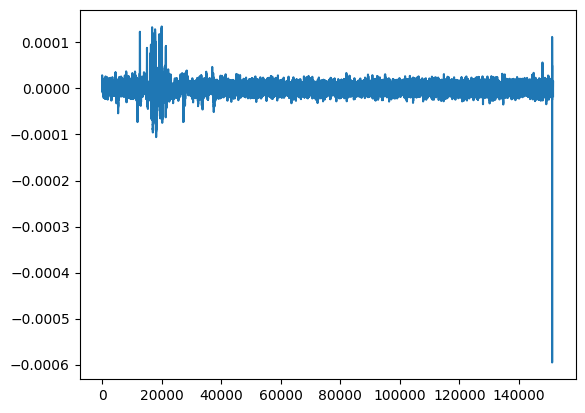

In [23]:
plt.plot(data[0])

Looks fine.
Now let's put the data into pandas dataframe which will be more convenient for further analysis and preprocessing:

In [24]:
len(content.ch_names), len(data)

(20, 20)

In [25]:
ts = dict(zip(content.ch_names, data))
ts

{'EEG Fp1-A1A2': array([ 2.24339024e-05,  2.71641233e-05,  2.85374132e-05, ...,
         2.90266765e-06, -9.15176627e-06, -1.67811548e-05], shape=(151500,)),
 'EEG Fp2-A1A2': array([ 1.70933304e-05,  2.01450858e-05,  2.16709635e-05, ...,
        -4.72672091e-06, -1.20509339e-05, -1.41871627e-05], shape=(151500,)),
 'EEG Fz-A1A2': array([ 1.64829793e-05,  1.80088570e-05,  1.57200404e-05, ...,
        -9.76211736e-06,  1.07161440e-06,  1.06846440e-05], shape=(151500,)),
 'EEG F3-A1A2': array([ 1.03794684e-05,  1.20579339e-05,  1.28208728e-05, ...,
         1.57200404e-05,  8.70100296e-06, -5.94742308e-06], shape=(151500,)),
 'EEG F4-A1A2': array([ 6.13851085e-07,  1.83455325e-06,  3.66560651e-06, ...,
        -6.71036193e-06, -1.51026894e-05, -1.73915059e-05], shape=(151500,)),
 'EEG F7-A1A2': array([ 1.00742929e-05,  1.69407426e-05,  2.33494290e-05, ...,
        -6.10001085e-06, -1.31190483e-05, -1.44923383e-05], shape=(151500,)),
 'EEG F8-A1A2': array([-6.25259862e-06, -8.99917850e-06,

Pandas dataframes can be constructed directly from such a dictionary:

In [26]:
ts = pd.DataFrame(ts)
ts.head()

,EEG Fp1-A1A2,EEG Fp2-A1A2,EEG Fz-A1A2,EEG F3-A1A2,EEG F4-A1A2,EEG F7-A1A2,EEG F8-A1A2,EEG Cz-A1A2,EEG C3-A1A2,EEG C4-A1A2,EEG T3-A1A2,EEG T4-A1A2,EEG Pz-A1A2,EEG P3-A1A2,EEG P4-A1A2,EEG T5-A1A2,EEG T6-A1A2,EEG O1-A1A2,EEG O2-A1A2,EEG LOC-ROC
0,0.000022,0.000017,0.000016,0.000010,6.138511e-07,0.000010,-0.000006,-1.980141e-06,0.000005,-3.048255e-06,0.000004,9.190266e-07,-1.369790e-06,0.000002,-5.184484e-06,4.612633e-07,0.000002,-1.369790e-06,3.086755e-07,0.000031
1,0.000027,0.000020,0.000018,0.000012,1.834553e-06,0.000017,-0.000009,-7.594389e-07,0.000007,-1.980141e-06,0.000007,2.750080e-06,-4.542633e-07,0.000003,-5.184484e-06,1.834553e-06,0.000002,-9.120266e-07,1.529378e-06,0.000040
2,0.000029,0.000022,0.000016,0.000013,3.665607e-06,0.000023,-0.000010,1.834553e-06,0.000010,3.086755e-07,0.000010,5.191484e-06,1.529378e-06,0.000005,-3.200843e-06,4.733721e-06,0.000002,4.612633e-07,3.665607e-06,0.000047
3,0.000027,0.000022,0.000011,0.000013,5.344072e-06,0.000027,-0.000010,5.344072e-06,0.000013,3.360431e-06,0.000013,7.785476e-06,3.970782e-06,0.000007,-1.490878e-07,8.853591e-06,0.000002,2.292317e-06,6.564774e-06,0.000052
4,0.000023,0.000021,0.000007,0.000013,6.564774e-06,0.000028,-0.000009,8.701003e-06,0.000015,6.412186e-06,0.000014,9.463942e-06,6.412186e-06,0.000010,3.207843e-06,1.282087e-05,0.000003,3.970782e-06,9.006179e-06,0.000053


Let's clean the column names:

In [27]:
ts.columns

Index(['EEG Fp1-A1A2', 'EEG Fp2-A1A2', 'EEG Fz-A1A2', 'EEG F3-A1A2',
       'EEG F4-A1A2', 'EEG F7-A1A2', 'EEG F8-A1A2', 'EEG Cz-A1A2',
       'EEG C3-A1A2', 'EEG C4-A1A2', 'EEG T3-A1A2', 'EEG T4-A1A2',
       'EEG Pz-A1A2', 'EEG P3-A1A2', 'EEG P4-A1A2', 'EEG T5-A1A2',
       'EEG T6-A1A2', 'EEG O1-A1A2', 'EEG O2-A1A2', 'EEG LOC-ROC'],
      dtype='object')

In [28]:
col = ts.columns[0]
col

'EEG Fp1-A1A2'

In [29]:
col[4:]

'Fp1-A1A2'

In [30]:
ts.columns = [col[4:] for col in ts.columns]
ts.head()

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000022,0.000017,0.000016,0.000010,6.138511e-07,0.000010,-0.000006,-1.980141e-06,0.000005,-3.048255e-06,0.000004,9.190266e-07,-1.369790e-06,0.000002,-5.184484e-06,4.612633e-07,0.000002,-1.369790e-06,3.086755e-07,0.000031
1,0.000027,0.000020,0.000018,0.000012,1.834553e-06,0.000017,-0.000009,-7.594389e-07,0.000007,-1.980141e-06,0.000007,2.750080e-06,-4.542633e-07,0.000003,-5.184484e-06,1.834553e-06,0.000002,-9.120266e-07,1.529378e-06,0.000040
2,0.000029,0.000022,0.000016,0.000013,3.665607e-06,0.000023,-0.000010,1.834553e-06,0.000010,3.086755e-07,0.000010,5.191484e-06,1.529378e-06,0.000005,-3.200843e-06,4.733721e-06,0.000002,4.612633e-07,3.665607e-06,0.000047
3,0.000027,0.000022,0.000011,0.000013,5.344072e-06,0.000027,-0.000010,5.344072e-06,0.000013,3.360431e-06,0.000013,7.785476e-06,3.970782e-06,0.000007,-1.490878e-07,8.853591e-06,0.000002,2.292317e-06,6.564774e-06,0.000052
4,0.000023,0.000021,0.000007,0.000013,6.564774e-06,0.000028,-0.000009,8.701003e-06,0.000015,6.412186e-06,0.000014,9.463942e-06,6.412186e-06,0.000010,3.207843e-06,1.282087e-05,0.000003,3.970782e-06,9.006179e-06,0.000053


In [33]:
# Tip: sumsample for faster plotting

In [34]:
ts.iloc[0]

Fp1-A1A2    2.243390e-05
Fp2-A1A2    1.709333e-05
Fz-A1A2     1.648298e-05
F3-A1A2     1.037947e-05
F4-A1A2     6.138511e-07
F7-A1A2     1.007429e-05
F8-A1A2    -6.252599e-06
Cz-A1A2    -1.980141e-06
C3-A1A2     5.496660e-06
C4-A1A2    -3.048255e-06
T3-A1A2     4.275958e-06
T4-A1A2     9.190266e-07
Pz-A1A2    -1.369790e-06
P3-A1A2     1.681965e-06
P4-A1A2    -5.184484e-06
T5-A1A2     4.612633e-07
T6-A1A2     2.292317e-06
O1-A1A2    -1.369790e-06
O2-A1A2     3.086755e-07
LOC-ROC     3.067364e-05
Name: 0, dtype: float64

In [37]:
ts.shape

(151500, 20)

In [31]:
ts.head(2)

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000022,0.000017,0.000016,0.000010,6.138511e-07,0.000010,-0.000006,-1.980141e-06,0.000005,-0.000003,0.000004,9.190266e-07,-1.369790e-06,0.000002,-0.000005,4.612633e-07,0.000002,-1.369790e-06,3.086755e-07,0.000031
1,0.000027,0.000020,0.000018,0.000012,1.834553e-06,0.000017,-0.000009,-7.594389e-07,0.000007,-0.000002,0.000007,2.750080e-06,-4.542633e-07,0.000003,-0.000005,1.834553e-06,0.000002,-9.120266e-07,1.529378e-06,0.000040


<Axes: >

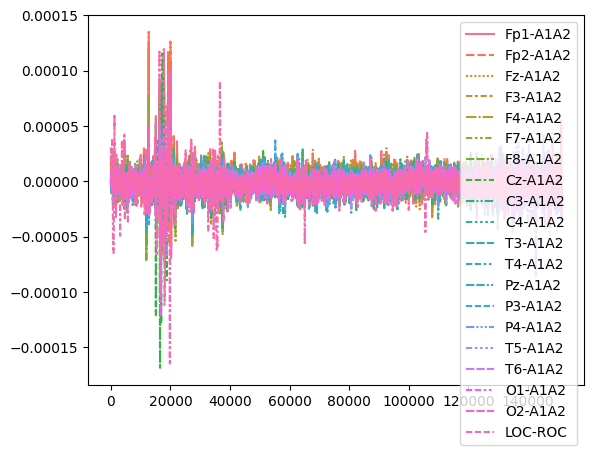

In [32]:
sns.lineplot(
    data=ts.iloc[::100, :]
)

Fine, but disturbing overlap.

In [33]:
sns.set() # Magic!

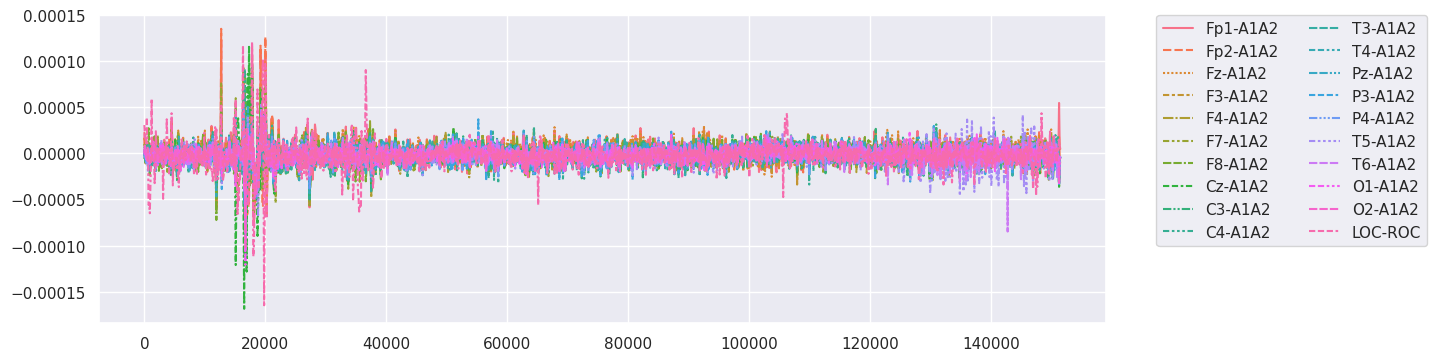

In [34]:
fig, ax = plt.subplots(figsize=(13, 4))
sns.lineplot(
    data=ts.iloc[::100, :],   # Subsample for fast plotting
    ax=ax
)
# Place the legend outside the plot in two columns
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=2)

In [35]:
ts

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000022,0.000017,0.000016,0.000010,6.138511e-07,0.000010,-0.000006,-1.980141e-06,0.000005,-3.048255e-06,0.000004,9.190266e-07,-1.369790e-06,0.000002,-5.184484e-06,4.612633e-07,0.000002,-1.369790e-06,3.086755e-07,0.000031
1,0.000027,0.000020,0.000018,0.000012,1.834553e-06,0.000017,-0.000009,-7.594389e-07,0.000007,-1.980141e-06,0.000007,2.750080e-06,-4.542633e-07,0.000003,-5.184484e-06,1.834553e-06,0.000002,-9.120266e-07,1.529378e-06,0.000040
2,0.000029,0.000022,0.000016,0.000013,3.665607e-06,0.000023,-0.000010,1.834553e-06,0.000010,3.086755e-07,0.000010,5.191484e-06,1.529378e-06,0.000005,-3.200843e-06,4.733721e-06,0.000002,4.612633e-07,3.665607e-06,0.000047
3,0.000027,0.000022,0.000011,0.000013,5.344072e-06,0.000027,-0.000010,5.344072e-06,0.000013,3.360431e-06,0.000013,7.785476e-06,3.970782e-06,0.000007,-1.490878e-07,8.853591e-06,0.000002,2.292317e-06,6.564774e-06,0.000052
4,0.000023,0.000021,0.000007,0.000013,6.564774e-06,0.000028,-0.000009,8.701003e-06,0.000015,6.412186e-06,0.000014,9.463942e-06,6.412186e-06,0.000010,3.207843e-06,1.282087e-05,0.000003,3.970782e-06,9.006179e-06,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151495,0.000016,0.000008,-0.000016,0.000004,8.853591e-06,0.000007,-0.000014,4.428545e-06,0.000009,7.785476e-06,-0.000013,-4.574133e-06,7.785476e-06,0.000006,-1.357681e-05,4.733721e-06,0.000011,7.327713e-06,-1.388199e-05,0.000006
151496,0.000013,0.000003,-0.000016,0.000013,2.902668e-06,0.000002,-0.000014,1.327864e-05,0.000003,6.107011e-06,-0.000014,7.175125e-06,2.139729e-06,0.000002,-1.418716e-05,1.526228e-05,0.000007,1.529378e-06,-1.418716e-05,0.000016
151497,0.000003,-0.000005,-0.000010,0.000016,-6.710362e-06,-0.000006,-0.000008,1.434675e-05,-0.000007,-6.068511e-07,-0.000007,1.602522e-05,-7.168125e-06,-0.000006,-7.778476e-06,1.770368e-05,-0.000003,-7.931064e-06,-7.320713e-06,0.000019
151498,-0.000009,-0.000012,0.000001,0.000009,-1.510269e-05,-0.000013,0.000003,5.649248e-06,-0.000015,-9.609530e-06,0.000004,1.648298e-05,-1.495010e-05,-0.000013,3.055255e-06,8.701003e-06,-0.000013,-1.601822e-05,3.970782e-06,0.000011


In [52]:
ts_subs = ts - ts.mean(axis=0)
ts_subs

,Fp1-A1A2,Fp2-A1A2,Fz-A1A2,F3-A1A2,F4-A1A2,F7-A1A2,F8-A1A2,Cz-A1A2,C3-A1A2,C4-A1A2,T3-A1A2,T4-A1A2,Pz-A1A2,P3-A1A2,P4-A1A2,T5-A1A2,T6-A1A2,O1-A1A2,O2-A1A2,LOC-ROC
0,0.000022,0.000017,0.000016,0.000010,6.084102e-07,0.000010,-0.000006,-1.986291e-06,0.000005,-3.053489e-06,0.000004,9.136503e-07,-1.375704e-06,0.000002,-5.190438e-06,4.555123e-07,0.000002,-1.375614e-06,3.032397e-07,0.000031
1,0.000027,0.000020,0.000018,0.000012,1.829112e-06,0.000017,-0.000009,-7.655887e-07,0.000007,-1.985374e-06,0.000007,2.744704e-06,-4.601775e-07,0.000003,-5.190438e-06,1.828802e-06,0.000002,-9.178502e-07,1.523942e-06,0.000040
2,0.000029,0.000022,0.000016,0.000013,3.660166e-06,0.000023,-0.000010,1.828403e-06,0.000010,3.034422e-07,0.000010,5.186108e-06,1.523464e-06,0.000005,-3.206797e-06,4.727970e-06,0.000002,4.554397e-07,3.660171e-06,0.000047
3,0.000027,0.000022,0.000011,0.000013,5.338631e-06,0.000027,-0.000010,5.337922e-06,0.000013,3.355198e-06,0.000013,7.780100e-06,3.964868e-06,0.000007,-1.550413e-07,8.847840e-06,0.000002,2.286493e-06,6.559338e-06,0.000052
4,0.000023,0.000021,0.000007,0.000013,6.559333e-06,0.000028,-0.000009,8.694853e-06,0.000015,6.406953e-06,0.000014,9.458565e-06,6.406272e-06,0.000010,3.201890e-06,1.281512e-05,0.000003,3.964958e-06,9.000743e-06,0.000053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151495,0.000016,0.000008,-0.000016,0.000004,8.848150e-06,0.000007,-0.000014,4.422395e-06,0.000009,7.780243e-06,-0.000013,-4.579510e-06,7.779562e-06,0.000006,-1.358277e-05,4.727970e-06,0.000011,7.321889e-06,-1.388742e-05,0.000006
151496,0.000013,0.000003,-0.000016,0.000013,2.897227e-06,0.000002,-0.000014,1.327249e-05,0.000003,6.101777e-06,-0.000014,7.169749e-06,2.133815e-06,0.000002,-1.419312e-05,1.525653e-05,0.000007,1.523554e-06,-1.419260e-05,0.000016
151497,0.000003,-0.000005,-0.000010,0.000016,-6.715803e-06,-0.000006,-0.000008,1.434060e-05,-0.000007,-6.120844e-07,-0.000007,1.601984e-05,-7.174039e-06,-0.000006,-7.784430e-06,1.769793e-05,-0.000003,-7.936888e-06,-7.326149e-06,0.000019
151498,-0.000009,-0.000012,0.000001,0.000009,-1.510813e-05,-0.000013,0.000003,5.643098e-06,-0.000015,-9.614763e-06,0.000004,1.647760e-05,-1.495602e-05,-0.000013,3.049302e-06,8.695252e-06,-0.000013,-1.602404e-05,3.965346e-06,0.000011


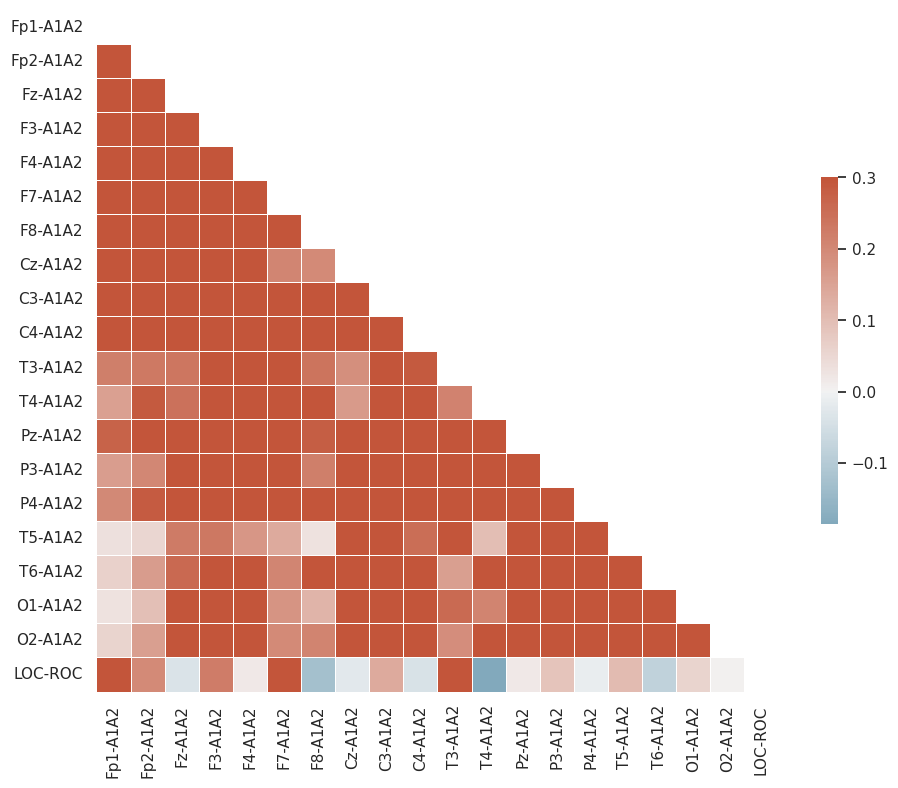

In [54]:
# Using this example https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set_theme(style="white")
corr = ts_subs.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});